In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

## Averaging Multiple NonG & G Runs

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


Lightcones are in the redshift range [3.44, 4.10] so mean redshift is 3.77; therefore nuObs is set to be $\frac{1897 \rm{GHz}}{1+3.77} \sim 400 \rm{GHz}$, 1897 GHz being the restframe frequency of $\rm{[C_{II}]}$

The smallest frequency is attained at the highest redshift, which would be $\frac{1897 \rm{GHz}}{1+4.10} \sim 372 \rm{GHz}$. The highest frequency is attained at the smallest redshift, which would be $\frac{1897 \rm{GHz}}{1+3.44} \sim 427 \rm{GHz}$. Therefore, the frequency range is [372, 427] GHz, or 400 GHz (nuObs) $\pm$ 28 GHz. Therefore, Delta_nu is set to 28 GHz.

The lightcone is at an average redshift of 3.77, which corresponds to an average comoving radial distance of 7150 MPc, or 7.15Gpc. The lightcone box is 500 Mpc by 500 Mpc in the RA/Dec space (which makes it a 500 Mpc x 500 Mpc x 7150 Mpc in comoving space), so the comvoving perpendicular size of the box is 500 Mpc. I approximate the angular size of the box $\theta$ to be $tan(\theta) = x/d$, where $x$ is the comoving perpendicular size of the box and $d$ is the comoving radial distance of the box. In this case, we hence have $tan(\theta) = 0.5\rm{Gpc}/7.15\rm{Gpc}$, such that $\theta \sim$ 0.07 rad $\sim$ 4 deg. Therefore, the lightcone surface is 4 deg x 4 deg in the observing direction, so we set Omega_field to be 16 deg².

In [3]:
m_cii.update(model_par = {'zdex': 0.3,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.017,
 'BehrooziFile': 'sfr_reinterp.dat'}, 
             tobs = 100000*u.hr,
             nuObs = 400*u.GHz,
             Delta_nu = 28*u.GHz,
             Omega_field = 16*(u.deg**2)
            )

In [4]:
m_cii.catalogue_file

'/mnt/scratch-lustre/horlaville/nate_sims/may_5/gaussian/gaussian_lc_M_gt_1.129e+11Msol.npz'

In [5]:
lc_paths = '/mnt/scratch-lustre/horlaville/nate_sims/june_9/ngaussian/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc3npz.py')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [6]:
map_shape = m_cii.maps.shape
noise_sigma = m_cii.sigma_N
noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, map_shape)

Loading .npz catalogues...


In [12]:
m_cii.update(catalogue_file = '/mnt/scratch-lustre/horlaville/nate_sims/june_9/ngaussian/ngauss_mlambda25_0.npz')

In [13]:
sig =  m_cii.maps.value
forecast = sig + noise_map

Loading .npz catalogues...


Text(0.5, 1.0, 'Histogram of Intensities, $t_{obs}$ = 100000h')

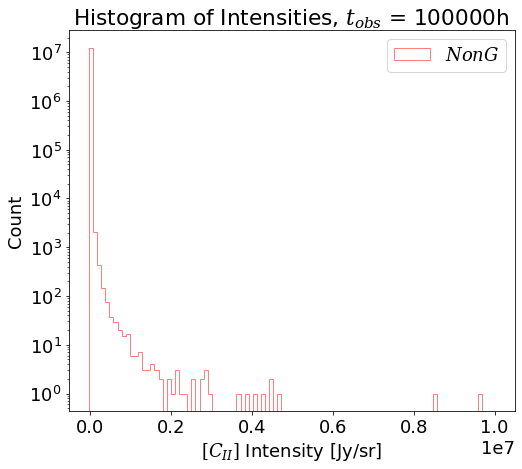

In [74]:
n_t, bins, _ = plt.hist(forecast.flatten(), bins = np.linspace(-20000, 10000000, 100), edgecolor = 'r', label = r'$NonG$', alpha = 0.5, histtype = 'step')
#n_mhi, _, _ = plt.hist(mhi_forecast.flatten(), bins = bins, edgecolor = 'black', label = r'$M_{HI}$', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')

In [9]:
map_shape = m_cii.maps.shape
noise_sigma = m_cii.sigma_N

Non-Gaussian:

In [6]:
ngauss_lum = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    m_cii.update(catalogue_file = onlyfiles[i])
    
    ngauss_lum[i] = m_cii.maps
    print('Done with', i, 'th lightcone')  

Loading .npz catalogues...
Done with 0 th lightcone
Loading .npz catalogues...
Done with 1 th lightcone
Loading .npz catalogues...
Done with 2 th lightcone
Loading .npz catalogues...
Done with 3 th lightcone
Loading .npz catalogues...
Done with 4 th lightcone
Loading .npz catalogues...
Done with 5 th lightcone
Loading .npz catalogues...
Done with 6 th lightcone
Loading .npz catalogues...
Done with 7 th lightcone
Loading .npz catalogues...
Done with 8 th lightcone
Loading .npz catalogues...
Done with 9 th lightcone
Loading .npz catalogues...
Done with 10 th lightcone
Loading .npz catalogues...
Done with 11 th lightcone
Loading .npz catalogues...
Done with 12 th lightcone
Loading .npz catalogues...
Done with 13 th lightcone
Loading .npz catalogues...
Done with 14 th lightcone
Loading .npz catalogues...
Done with 15 th lightcone
Loading .npz catalogues...
Done with 16 th lightcone
Loading .npz catalogues...
Done with 17 th lightcone
Loading .npz catalogues...
Done with 18 th lightcone
Loa

In [7]:
n_ng = [0 for i in range(len(onlyfiles))]

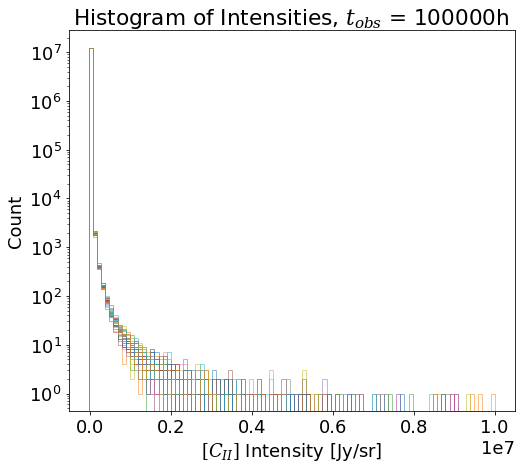

In [66]:
for i in range(len(onlyfiles)):
    
    np.random.seed(i)
    noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, map_shape)
    
    forecast = ngauss_lum[i].value + noise_map
    
    n_ng[i], _, _ = plt.hist(forecast.flatten(), bins = np.linspace(-20000, 10000000, 100), alpha = 0.5, histtype = 'step')

    plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')

In [67]:
avg_ngauss = np.nanmean(n_ng, axis = 0)

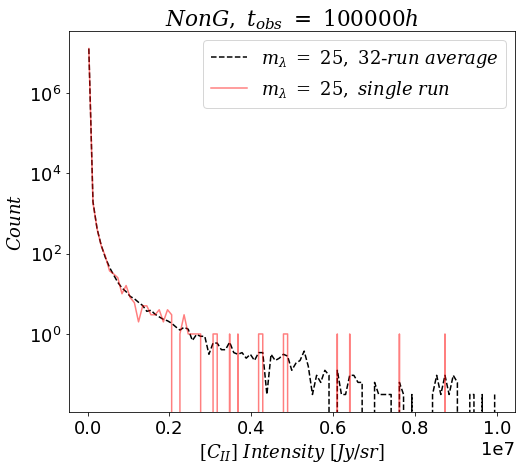

In [75]:
plt.plot(center, avg_ngauss, '--k', label = r'$m_\lambda\ =\ 25,\ 32$-$run\ average$')
plt.plot(center, n_ng[4], 'r', label = r'$m_\lambda\ =\ 25,\ single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$NonG,\ t_{obs}\ =\ 100000h$')
plt.legend()
plt.savefig('casca/plots/ngaussian_1e7.png', bbox_inches = 'tight')

Gaussian:

In [22]:
lc_paths_g = '/mnt/scratch-lustre/horlaville/nate_sims/june_9/gaussian/'
from os import listdir
from os.path import isfile, join
onlyfiles_g = [f for f in listdir(lc_paths_g) if isfile(join(lc_paths_g, f))]
onlyfiles_g.remove('pksc3npz.py')
for i in range(len(onlyfiles_g)):
    onlyfiles_g[i] = lc_paths_g+onlyfiles_g[i]

In [25]:
gauss_lum = [0 for i in range(len(onlyfiles_g))]

for i in range(len(onlyfiles_g)):
    
    m_cii.update(catalogue_file = onlyfiles_g[i])
    
    gauss_lum[i] = m_cii.maps
    print('Done with', i, 'th lightcone')

Loading .npz catalogues...
Done with 0 th lightcone
Loading .npz catalogues...
Done with 1 th lightcone
Loading .npz catalogues...
Done with 2 th lightcone
Loading .npz catalogues...
Done with 3 th lightcone
Loading .npz catalogues...
Done with 4 th lightcone
Loading .npz catalogues...
Done with 5 th lightcone
Loading .npz catalogues...
Done with 6 th lightcone
Loading .npz catalogues...
Done with 7 th lightcone
Loading .npz catalogues...
Done with 8 th lightcone
Loading .npz catalogues...
Done with 9 th lightcone
Loading .npz catalogues...
Done with 10 th lightcone
Loading .npz catalogues...
Done with 11 th lightcone
Loading .npz catalogues...
Done with 12 th lightcone
Loading .npz catalogues...
Done with 13 th lightcone
Loading .npz catalogues...
Done with 14 th lightcone


In [26]:
n_g = [0 for i in range(len(onlyfiles_g))]

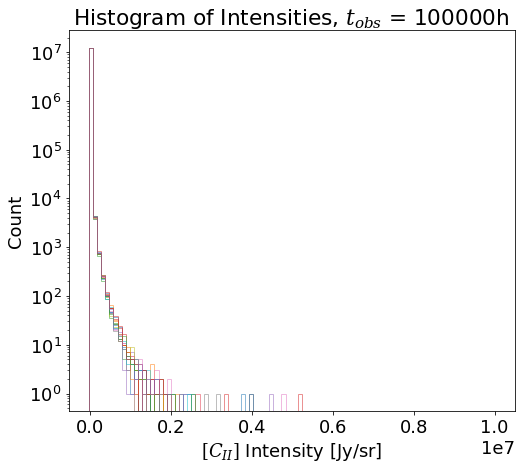

In [69]:
for i in range(len(onlyfiles_g)):
    
    np.random.seed(i)
    noise_map = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m_cii.nuObs)).value, map_shape)
    
    forecast_g = gauss_lum[i].value + noise_map
    
    n_g[i], _, _ = plt.hist(forecast_g.flatten(), bins = np.linspace(-20000, 10000000, 100), alpha = 0.5, histtype = 'step')

    plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.title(r'Histogram of Intensities, $t_{obs}$ = 100000h')

In [70]:
avg_gauss = np.nanmean(n_g, axis = 0)

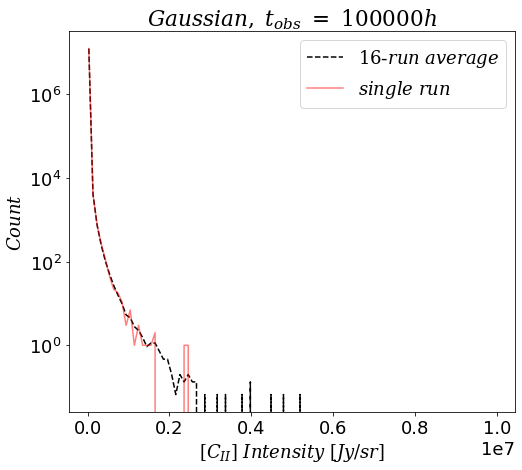

In [76]:
plt.plot(center, avg_gauss, '--k', label = r'$16$-$run\ average$')
plt.plot(center, n_g[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Gaussian,\ t_{obs}\ =\ 100000h$')
plt.legend()
plt.savefig('casca/plots/gaussian_1e7.png', bbox_inches = 'tight')

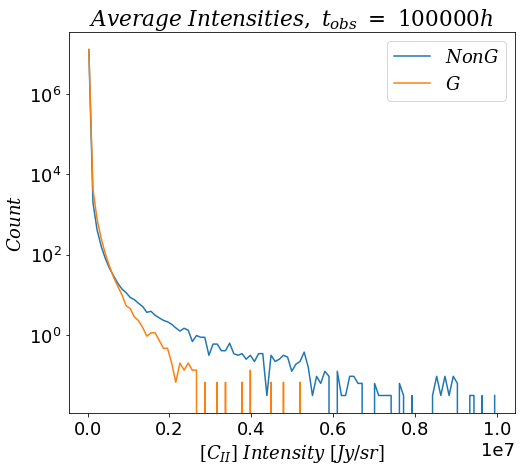

In [77]:
plt.plot(center, avg_ngauss, label = r'$NonG$')
plt.plot(center, avg_gauss, label = r'$G$')
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Average\ Intensities,\ t_{obs}\ =\ 100000h$')
plt.legend()
plt.savefig('casca/plots/avg_nong_g_1e7.png', bbox_inches = 'tight')

In [52]:
plt.rcParams["mathtext.fontset"] = "dejavuserif"

/tmp/ipykernel_2779686/680269141.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(avg_ngauss/avg_gauss), '--k', label = r'$ln(NonG/G),\ average$')
/tmp/ipykernel_2779686/680269141.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(avg_ngauss/avg_gauss), '--k', label = r'$ln(NonG/G),\ average$')
/tmp/ipykernel_2779686/680269141.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(center, np.log(n_ng[4]/n_g[4]), 'r', label = r'$ln(NonG/G),\ single\ run$', alpha = 0.5)
/tmp/ipykernel_2779686/680269141.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(center, np.log(n_ng[4]/n_g[4]), 'r', label = r'$ln(NonG/G),\ single\ run$', alpha = 0.5)


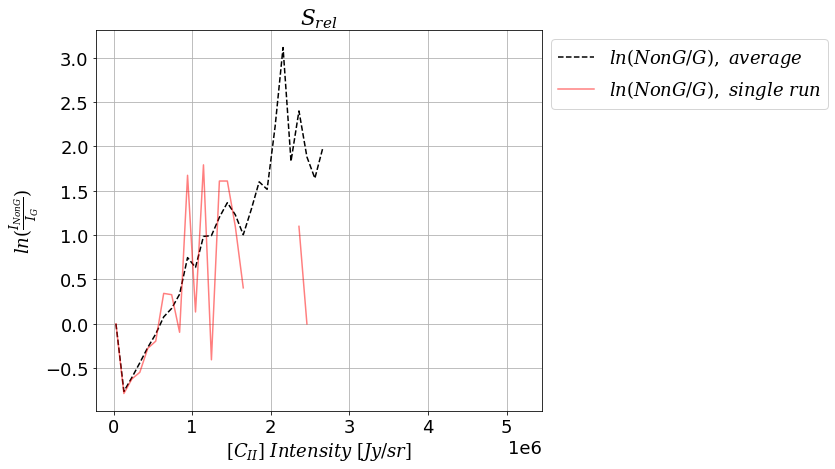

In [78]:
plt.plot(center, np.log(avg_ngauss/avg_gauss), '--k', label = r'$ln(NonG/G),\ average$')
plt.plot(center, np.log(n_ng[4]/n_g[4]), 'r', label = r'$ln(NonG/G),\ single\ run$', alpha = 0.5)
plt.title(r'$S_{rel}$')
plt.xlabel(r'$[C_{II}]\ Intensity\ [Jy/sr]$')
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel(r'$ln(\frac{I_{NonG}}{I_{G}})$')
plt.grid()
plt.savefig('casca/plots/srel_avg_1e7.png', bbox_inches = 'tight')